# Nuages de mots

## Imports et stopwords

In [1]:
from collections import Counter
from wordcloud import WordCloud
import os
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from IPython.display import Image

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\janvi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# Stopwords (Idem que dans s1)
sw = stopwords.words("french")
sw += ["les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout", "bien", "peut", "tous", "autant", "elles",
       "après", "ainsi", "donc", "cet", "sous", "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non", "prochain",
       "faut", "trois", "aussi", "dit", "doit", "contre", "depuis","quand", "tant", "donner", "ici", "article", "également", "moment",
       "van", "het", "autre", "jusqu", "ville", "rossel", "dem", "leurs", "très", "fois", "beaucoup", "surtout", "enfin", "heure", "maintenant",
       "alors", "près", "ans", "car", "ai", "aie", "aient", "aies", "ait","rien", "seulement", "voici","reste", "ensuite", "importance",
       "as", "au", "aura", "aurai", "auraient", "aurais", "aurait", "auras", "aurez", "auriez", "aurions", "actuellement", "font", "titres",
       "aurons", "auront", "autre", "autres", "aux", "avaient", "avais", "avait", "avant", "avec", "avez", "jamais", "trop", "quant",
       "aviez", "avions", "avoir", "avons", "ayant", "ayante", "ayantes", "ayants", "ayez", "ayons", "aucune","Elles","puis", "semble",
       "c", "ce", "ces", "cet", "ceux", "chaque", "compte", "d", "dans", "de", "des","du", "déjà", "elle", "en", "es", "est", "suivant",
       "et", "etc", "eu", "eue", "eues", "eurent", "eus", "eusse", "eussent", "eusses", "eussiez", "eussions", "eut", "eux", "grands", "dix",
       "eûmes", "eût", "eûtes", "faits","furent", "fus", "fusse", "fussent", "fusses", "fussiez", "fussions", "fut", "fûmes", "fût", 
       "fûtes", "générale", "heures", "il", "ils", "j", "je", "jour", "jours", "jusqu", "l", "la", "le", "les", "leur", "leurs", "liste", 
       "lui", "m", "ma", "mais", "me", "mes", "mis", "moi", "mois", "mon", "même", "n", "ne", "nombre", "nos", "dernier", "façon",
       "notre", "nous", "on", "ont", "ou", "page", "par", "parce", "pas", "point", "pour", "premier","plusieurs", "celles", 
       "pris", "qu", "que", "quelques", "qui", "rue", "réponse", "s", "sa", "sans", "se", "sera", "serai", "seraient", "vue", "voir",
       "serais", "serait", "seras", "serez", "seriez", "serions", "serons", "seront", "ses", "seul", "seule", "environ", "chez",
       "soient", "sois", "soit", "sommes", "son", "sont", "sous", "soyez", "soyons", "suis", "suite", "sur", "t", "ta", 
       "te", "tes", "toi", "ton", "toute", "tu", "un", "une", "van", "vie", "vos", "votre", "possible", "malgré", "dès", "moyens"
       "vous", "y", "à", "étaient", "étais", "était", "étant", "étante", "étantes", "étants", "étiez", "étions", "devant", "dernier",
       "été", "étée", "étées", "étés", "êtes", "pondu", "aucun", "celui", "doivent", "mieux", "parmi", "mal", "cent", 
       "bonne", "bon", "certaines", "certains", "mettre", "sujet", "nouvelle", "nouveau", "sait", "vient", "peu", "concerne", 
       "cas", "vers", "millions", "milliards", "Elles", "doute", "notamment", "fort", "grande", "dernière", "divers", "effet", 
       "mesure", "général", "grandes", "chiffres", "cependant", "hier", "question", "quelque", "laquelle", "séance", "trouve", "prendre",
       "assez", "mêmes", "chambre", "nom", "cinq", "nouveaux", "ailleurs", "MME", "atteint", "tonnes", "occasion", "donnée", "net", 
       "quatre", "toujours", "chef", "aujourd'hui", "actuelle", "abord", "grand", "quand", "certain", "aujourd", "petit", "exercice", "pourrait"]
sw = set(sw)


## Créer un fichier contenant le texte de tous les journaux d'une année donnée

In [3]:
# Choisir une année
year = 1945

In [4]:
# Lister les Fichiers
data_path = "../data/camille_crise_economique_année 30/"
files = os.listdir(data_path)

In [5]:
# Stocker le contenu de ces fichiers dans une liste
content_list = []
for myFile in files:
    with open(data_path+myFile, 'r', encoding='utf-8') as f:
        content_list.append(f.read())

In [6]:
# Compter le nombre d'éléments (=fichiers) dans la liste
len(content_list)

1000

In [7]:
# Imprimer les 200 premiers caractères du contenu du premier fichier
content_list[0][0:200]

"43 m ' ANNEE. — N* 53 •••••••• VENDREDI 22 FEVRIER 1929. Edit. mes 14 PAGES - 30 C '/■■n <oc. « Allemagne occupée! A l’Etranger : 35 Centimes ABONNEMENTS Agglomération bruxelloise . .. •• Par mois. 7."

In [8]:
# Ecrire tout le contenu dans un fichier temporaire
temp_path = '../data/tmp'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(os.path.join(temp_path, 'crise.txt'), 'w', encoding='utf-8') as f:
    f.write(' '.join(content_list))

In [9]:
# Imprimer le contenu du fichier et constater les "déchets"
with open(os.path.join(temp_path, 'crise.txt'), 'r', encoding='utf-8') as f:
    before = f.read()

before[:500]

"43 m ' ANNEE. — N* 53 •••••••• VENDREDI 22 FEVRIER 1929. Edit. mes 14 PAGES - 30 C '/■■n <oc. « Allemagne occupée! A l’Etranger : 35 Centimes ABONNEMENTS Agglomération bruxelloise . .. •• Par mois. 7.50 Troismois 22.00 1 Six mois. 42.50 Un an . 82.50 Congo belge Un an . 100.00 Etranger : Prix suivant conventions postales i P° m ,0 P'oomcc on Province , a ‘ aicnnt à i a p^ t •• LE SOIR 4 Editions * * * * K 14 h. 15 * * * à 17 b. 30 * * à 18 b. 30 Jfc Edit, de Nuit r Rédaction : Place de Louvain, "

## Nettoyer le fichier à l'aide d'une fonction de nettoyage

### Créer la fonction de nettoyage (à adapter)

In [10]:
def clean_text(folder=None):
    if folder is None:
        input_path = "crise.txt"
        output_path = "crise_clean.txt"
    else:
        input_path = f"{folder}/crise.txt"
        output_path = f"{folder}/crise_clean.txt"
    output = open(output_path, "w", encoding='utf-8')
    with open(input_path, 'r', encoding='utf-8') as f:
        text = f.read()
        words = nltk.wordpunct_tokenize(text)
        kept = [w.upper() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
        kept_string = " ".join(kept)
        output.write(kept_string)
    return f'Output has been written in {output_path}!'

### Appliquer la fonction sur le fichier complet de l'année

In [11]:
clean_text(folder=temp_path)

'Output has been written in ../data/tmp/crise_clean.txt!'

In [12]:
# Vérifier le résultat
with open(os.path.join(temp_path, 'crise_clean.txt'), 'r', encoding='utf-8') as f:
    after = f.read()

after[:500]

'ANNEE VENDREDI FEVRIER EDIT PAGES ALLEMAGNE OCCUPÉE ETRANGER CENTIMES ABONNEMENTS AGGLOMÉRATION BRUXELLOISE TROISMOIS SIX CONGO BELGE ETRANGER PRIX CONVENTIONS POSTALES OOMCC PROVINCE AICNNT SOIR EDITIONS JFC EDIT NUIT RÉDACTION PLACE LOUVAIN ADMINISTRATION PLACE LOUVAIN ANNONCES AGENCE ROYALE PAGES SALLE DÉPÊCHES ROYALE BRUXELLES BUREAUX FILS SPÉCIAUX PARIS PLACE BOURSE LONDRES FLEET STREET RÉDACTION TÉLÉPHONES ANNONCES IMPRIMERIE COMPTA CHÈQUES POSTAUX FIL AVPR NWNIGT RLA PHOTOGRAPHIES MAGNIFI'

## Nuage de mots

### Afficher les termes les plus fréquents


In [13]:
frequencies = Counter(after.split())
print(frequencies.most_common(10))

[('GOUVERNEMENT', 9276), ('BRUXELLES', 8156), ('MINISTRE', 7686), ('PAYS', 7563), ('PRÉSIDENT', 6857), ('PRIX', 6341), ('BELGIQUE', 6196), ('PARIS', 5803), ('POLITIQUE', 5504), ('FRANCE', 5233)]


### Créer, stocker et afficher le nuage de mots

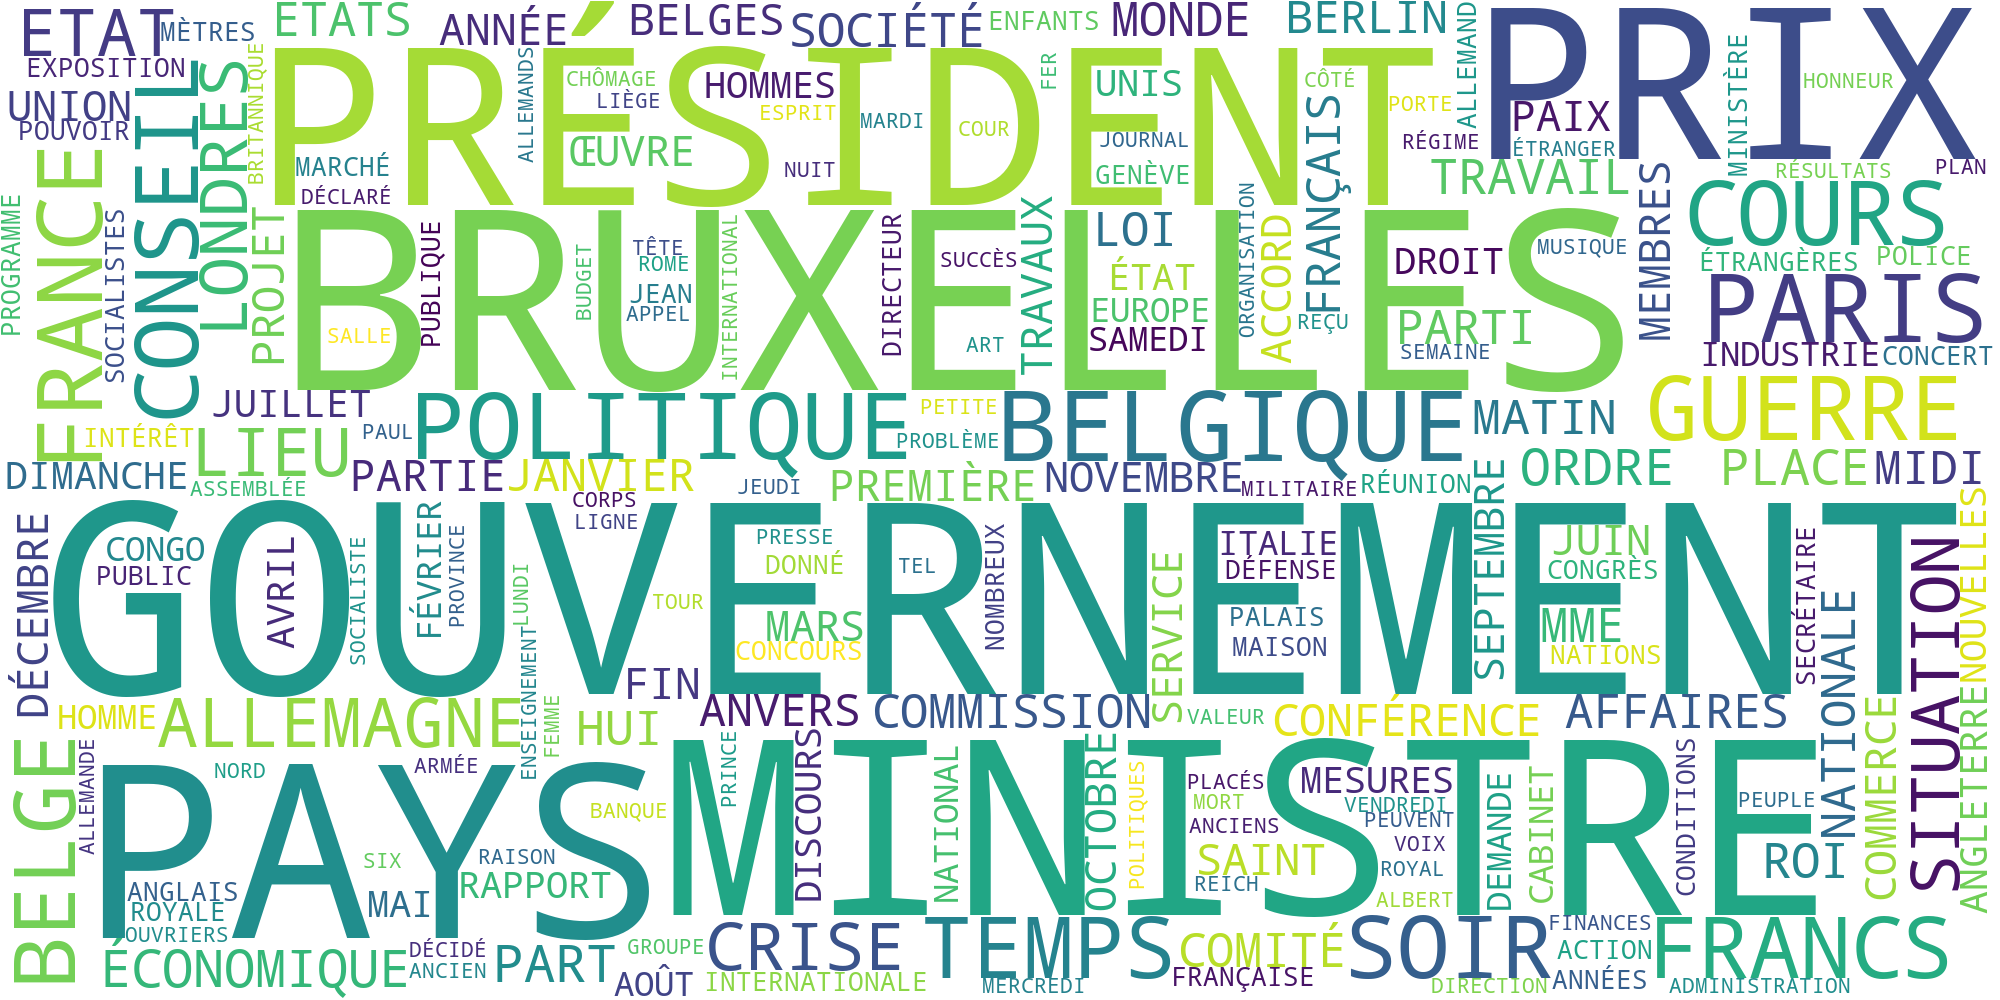

In [14]:
cloud = WordCloud(width=2000, height=1000, background_color='white').generate_from_frequencies(frequencies)
cloud.to_file(os.path.join(temp_path, "crise.png"))
Image(filename=os.path.join(temp_path, "crise.png"))